# **Kaggle Mini-Project: Natural Language Processing with Disaster Tweets**

### **Ted Baird**



This Jupyter notebook will be split into multiple sections. They are:

1. Problem and Data Description
2. Exploratory Data Analysis
3. CNN Model Architecture
4. Results and Analysis
5. Conclusion

## Section 1: Problem and Data Description

The Kaggle project information can be found here: 


https://www.kaggle.com/c/nlp-getting-started/overview 

From the competition overview:

"This Kaggle competition is about classifying texts. It is an excellent introduction to Natural Language Processing (NLP). 

In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified. 

Evaluation
Submissions are evaluated using F1 between the predicted and expected answers.

F1 is calculated as follows:
𝐹1=2∗𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛∗𝑟𝑒𝑐𝑎𝑙𝑙/𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛+𝑟𝑒𝑐𝑎𝑙𝑙

where:

𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛=𝑇𝑃/𝑇𝑃+𝐹𝑃
𝑟𝑒𝑐𝑎𝑙𝑙=𝑇𝑃/𝑇𝑃+𝐹𝑁

and:

True Positive [TP] = your prediction is 1, and the ground truth is also 1 - you predicted a positive and that's true!
False Positive [FP] = your prediction is 1, and the ground truth is 0 - you predicted a positive, and that's false.
False Negative [FN] = your prediction is 0, and the ground truth is 1 - you predicted a negative, and that's false.

Submission File
For each ID in the test set, you must predict 1 if the tweet is describing a real disaster, and 0 otherwise. The file should contain a header and have the following format:

id,target
0,0
2,0
3,1
9,0
11,0"


In [1]:
#Import the required libraries

'''
Natural Language Processing
NLTK, or Natural Language Toolkit, provides functions and data that can be used for natural language processing.
SpaCy is an open source library for advanced Natural Language Processing (NLP). It is designed for production use and can be used in applications to that process and “understand” large volumes of text. Installation guide can be found here.
FuzzyWuzzy is used for string matching. Fuzzy string matching is the process of finding strings that match a given pattern.
'''


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import string

!pip install keras-core --upgrade
!pip install -q keras-nlp --upgrade

# This sample uses Keras Core, the multi-backend version of Keras.
# The selected backend is TensorFlow (other supported backends are 'jax' and 'torch')
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

import tensorflow as tf
import keras_core as keras
import keras_nlp

!pip install tensorflow-text
!pip install tf-models-official
#make sure to run the shell script 'Install Certificates.command' in your Python folder to allow certificate verification
import collections
import pathlib

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import utils
#from tensorflow.keras.layers import TextVectorization

!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization







2023-09-27 10:26:49.333566: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using TensorFlow backend
  Obtaining dependency information for tf-models-official from https://files.pythonhosted.org/packages/d8/c3/4511e49412492966f4e6e0a20b41ae66d027e5a76e8c2b436b591ecc4273/tf_models_official-2.13.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for Cython from https://files.pythonhosted.org/packages/bc/bb/6a855a90e52f951e88612609cbd7dd928ec73514b18685944476748fbc10/Cython-3.0.2-cp310-cp310-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for google-api-python-client>=1.6.7 from https://files.pythonhosted.org/packages/3d/7e/ddf1a1e19e00800005833f5bddd8576d93d22d4a4dda241ae3c8c4aecb1f/google_api_python_client-2.101.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for immutabledict from https://files.pythonhosted.org/packages/df/ef/e038d0d7cd1954c46402a0c27794dd93982c40632085046efb6ab8aa6c1d/immutabledict-3.0.0-py3-none-any.w

/Users/tedbaird/Library/Python/3.10/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In this section I will describe the size, dimension, structure, etc., of the data. 

In [2]:
#import the training and testing data

train_df = pd.read_csv('/Users/tedbaird/Desktop/NN Week 4 Kaggle/nlp-getting-started/train.csv')
test_df = pd.read_csv('/Users/tedbaird/Desktop/NN Week 4 Kaggle/nlp-getting-started/test.csv')

print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)


Train set shape: (7613, 5)
Test set shape: (3263, 4)


## Section 2: Exploratory Data Analysis

In this section I will describe any data cleaning procedures and show some visualizations of the data. Based on this exploration, I will answer the question: What is the plan of analysis?

In [3]:
#view the head of the df
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
#Basic length data of the texts
train_df["length"] = train_df["text"].apply(lambda x : len(x))
test_df["length"] = test_df["text"].apply(lambda x : len(x))

print("Train Length Stat")
print(train_df["length"].describe())
print()

print("Test Length Stat")
print(test_df["length"].describe())

Train Length Stat
count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

Test Length Stat
count    3263.000000
mean      102.108183
std        33.972158
min         5.000000
25%        78.000000
50%       109.000000
75%       134.000000
max       151.000000
Name: length, dtype: float64


In [6]:
#check for duplicates
train_df.duplicated().sum()

0

In [7]:
#check for nulls
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
length         0
dtype: int64

<Axes: xlabel='count', ylabel='target'>

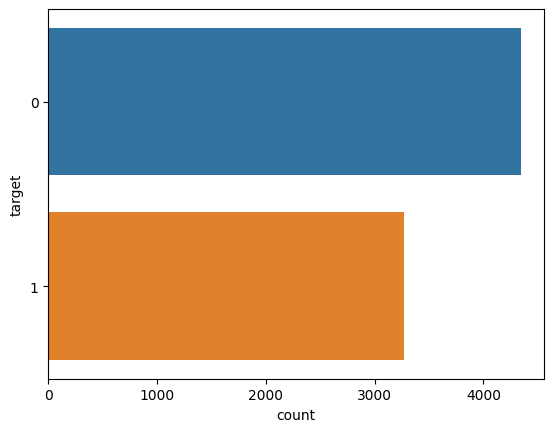

In [8]:
#view the target balance
sns.countplot(y=train_df.target)

In [9]:
#Check some tweets: Not a disaster tweet

train_df[train_df["target"] == 0]["text"].values[2]

'Summer is lovely'

In [10]:
#A disaster tweet

train_df[train_df["target"] == 1]["text"].values[10]

'Three people died from the heat wave so far'

In [11]:
# Check for number of unique keywords
print("Unique keywords in training set:", train_df.keyword.nunique())
print("Unique keywords in test set:", test_df.keyword.nunique())

Unique keywords in training set: 221
Unique keywords in test set: 221


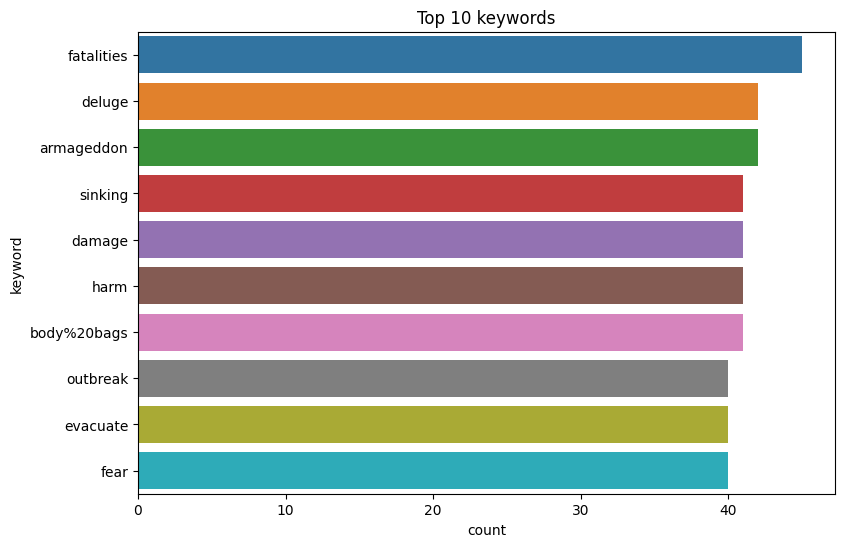

In [12]:
#Top ten keywords
plt.figure(figsize=(9,6))
sns.countplot(y=train_df.keyword, order = train_df.keyword.value_counts().iloc[:10].index)
plt.title('Top 10 keywords')
plt.show()

In [13]:
# Check number of unique locations
print ("Unique locations in the training set:", train_df.location.nunique())
print ("Unique locations in the test set:", test_df.location.nunique())

Unique locations in the training set: 3341
Unique locations in the test set: 1602


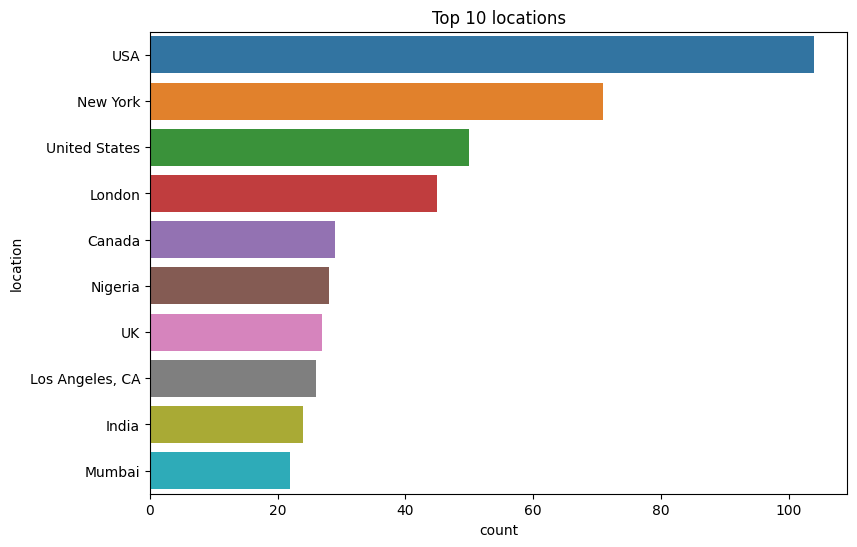

In [14]:
#Top 10 locations
plt.figure(figsize=(9,6))
sns.countplot(y=train_df.location, order = train_df.location.value_counts().iloc[:10].index)
plt.title('Top 10 locations')
plt.show()

Based on this EDA, what is the plan of analysis? 

In this competition, the goal is to develop a machine learning model that can distinguish between tweets related to real disasters and those that are not. The dataset consists of a little over 10,000 hand-classified tweets. 

For this notebook I will utilize the DistilBERT pretrained model from KerasNLP, which is a compressed version of the BERT (Bidirectional Encoder Representations from Transformers) model.

-   For info on BERT see: https://keras.io/guides/keras_nlp/getting_started/
-   Starter notebook: https://www.kaggle.com/code/alexia/kerasnlp-starter-notebook-disaster-tweets
-   For a very detailed EDA including unigrams, bigrams, and trigrams, see: https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert

## Section 3: Model Architecture

Here I describe the model architecture and reasoning for why the DistilBERT architecture is suitable for this problem. 

BERT and similar Transformer encoder architectures are successful in natural language processing tasks by generating vector-space representations of language suitable for deep learning models. The BERT models are pretrained on large text corpora and fine-tuned for specific tasks.

DistilBERT is a distilled form of BERT, achieved by reducing the size of the model by 40% through knowledge distillation during pre-training. It retains 97% of BERT's language understanding abilities, is 60% faster, and uses only half the number of parameters. The DistilBERT model chosen for this task lacks token-type embeddings, pooler, and retains only half of the layers from the original BERT, resulting in 40% fewer parameters. Despite these reductions, it preserves over 95% of BERT's performance.

The provided BertClassifier model is configured with a preprocessor layer, automatically applying preprocessing to raw inputs during fit(), predict(), and evaluate(). DistilBERT is preferred for this competition due to its efficiency and maintained high performance compared to the original BERT.

-   For info on BERT see: https://keras.io/guides/keras_nlp/getting_started/


In [15]:
#Preprocessing

BATCH_SIZE = 32
NUM_TRAINING_EXAMPLES = train_df.shape[0]
TRAIN_SPLIT = 0.8
VAL_SPLIT = 0.2
STEPS_PER_EPOCH = int(NUM_TRAINING_EXAMPLES)*TRAIN_SPLIT // BATCH_SIZE

EPOCHS = 2
AUTO = tf.data.experimental.AUTOTUNE

In [16]:
#Train-test-split

X = train_df["text"]
y = train_df["target"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_SPLIT, random_state=42)

X_test = test_df["text"]

In [17]:
#Load a DistilBERT model.
preset= "distil_bert_base_en_uncased"

# Use a shorter sequence length.
preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(preset,
                                                                   sequence_length=160,
                                                                   name="preprocessor_4_tweets"
                                                                  )

# Pretrained classifier.
classifier = keras_nlp.models.DistilBertClassifier.from_preset(preset,
                                                               preprocessor = preprocessor, 
                                                               num_classes=2)

classifier.summary()

265570304/265570304 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


Preprocessor: "preprocessor_4_tweets"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)        │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "distil_bert_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃     Param # ┃ Connected to                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │           0 │ -                              │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │           0 │ -                              │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ distil_bert_backbone          │ (None, None, 768)         │  66,362,880 │ padding_mask[0][0],            │
│ (DistilBertBackbone)          │                           │             │ token_ids[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ get_item (GetItem)            │ (None, 768)               │           0 │ distil_bert_backbone[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │     590,592 │ get_item[0][0]                 │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ classifier_dropout (Dropout)  │ (None, 768)               │           0 │ pooled_dense[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │       1,538 │ classifier_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────┴────────────────────────────────┘

 Total params: 66,955,010 (255.41 MB)

 Trainable params: 66,955,010 (255.41 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Compile
classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), #'binary_crossentropy',
    optimizer=keras.optimizers.Adam(1e-5),
    metrics= ["accuracy"]  
)

# Fit
history = classifier.fit(x=X_train,
                         y=y_train,
                         batch_size=BATCH_SIZE,
                         epochs=EPOCHS, 
                         validation_data=(X_val, y_val)
                        )

Epoch 1/2
191/191 ━━━━━━━━━━━━━━━━━━━━ 2161s 11s/step - accuracy: 0.7329 - loss: 0.5654 - val_accuracy: 0.8431 - val_loss: 0.3919
Epoch 2/2
191/191 ━━━━━━━━━━━━━━━━━━━━ 2087s 11s/step - accuracy: 0.8458 - loss: 0.3758 - val_accuracy: 0.8431 - val_loss: 0.3848


## Section 4: Results and Analysis

The model's accuracy improved from 73.29% to 84.58% between the first and second epochs. The validation accuracy remained constant at 84.31% for both epochs. The loss decreased from 0.5654 to 0.3758 during the training phase. The training times per step were consistent at 11 seconds, and the total training times for each epoch were 2161 seconds for Epoch 1 and 2087 seconds for Epoch 2. 

In this section I will print the Confusion Matrix and the F1 scores for the training and validation datasets. Then I will predict on the test set and save the results.

The F1 score combines precision and recall into a single value. Precision measures the accuracy of the positive predictions, while recall measures the ability of the model to capture all the positive instances. The F1 score is particularly useful when there is an uneven class distribution like in this dataset.

In [19]:
#print the confusion matrix
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        np.argmax(y_pred, axis=1),
        display_labels=["Not Disaster","Disaster"],
        cmap=plt.cm.Blues
    )

    tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()
    f1_score = tp / (tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(f1_score.round(2)))

191/191 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step


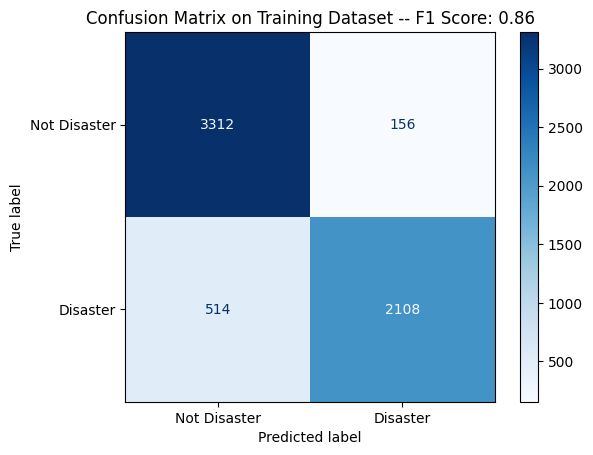

In [20]:
#predict on the trained model
y_pred_train = classifier.predict(X_train)

displayConfusionMatrix(y_train, y_pred_train, "Training")

48/48 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step


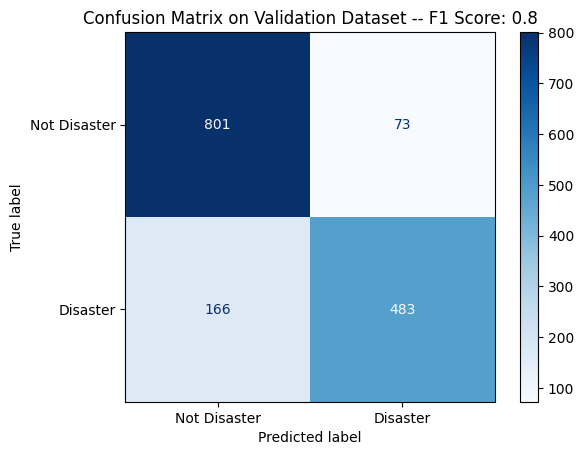

In [21]:
#predict on the validation set
y_pred_val = classifier.predict(X_val)

displayConfusionMatrix(y_val, y_pred_val, "Validation")

In [22]:
#prepare the submission file
sample_submission = pd.read_csv('/Users/tedbaird/Desktop/NN Week 4 Kaggle/nlp-getting-started/sample_submission.csv')
sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [23]:
#predict the target for the submission file
sample_submission["target"] = np.argmax(classifier.predict(X_test), axis=1)

102/102 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step


In [24]:
#see the submission file details

sample_submission.describe()

,id,target
count,3263.000000,3263.000000
mean,5427.152927,0.355808
std,3146.427221,0.478831
min,0.000000,0.000000
25%,2683.000000,0.000000
50%,5500.000000,0.000000
75%,8176.000000,1.000000
max,10875.000000,1.000000


In [25]:
#save the submission file

sample_submission.to_csv("submission.csv", index=False)

## Section 5: Conclusion

What did and did not help improve the performance of your models? What improvements could you try in the future?

Let's look at the F1 scores:


Training Dataset F1 Score (0.86):

The fairly high F1 score on the training dataset (0.86) suggests that the model performs well in terms of both precision and recall. It indicates that the model is effective at correctly identifying and classifying instances of both classes (real disasters and non-disasters) in the training data, but could use some improvement in precision and recall.

Validation Dataset F1 Score (0.8):

The slightly lower F1 score on the validation dataset (0.8) compared to the training dataset could be due to several reasons. It might indicate a slight drop in the model's generalization performance on unseen data. This could be caused by overfitting, where the model becomes too tailored to the training data and does not generalize well to new, unseen examples. It's also important to consider the context of the problem and the consequences of false positives and false negatives. For example, in a disaster prediction scenario, false negatives (predicting a non-disaster tweet as a disaster) might be more critical than false positives. Thus, fine tuning the model using other metrics could be helpful, even while the choice of the F1 score reflects a balance between precision and recall.

Possible Improvements:

Since the difference between the training and test F1 scores is significant, it might be beneficial to explore techniques to address overfitting, such as regularization or increasing the diversity of training data. Perhaps a different model could work as well, but my machine is quite slow and it would take a while to converge. Examining other metrics can provide more insights into the model's performance and areas that may need improvement. Fine-tuning hyperparameters or considering more advanced architectures might also be explored to enhance the model's generalization capability.

Some other possible models to explore are:
-   RoBERTa (Robustly optimized BERT approach): RoBERTa is an optimized version of BERT that modifies key hyperparameters and trains with larger mini-batches and learning rates.
-   ALBERT (A Lite BERT): ALBERT is designed to scale down the size of BERT while maintaining performance. It achieves this by sharing parameters across layers, reducing memory consumption.

Some other possible metrics to explore are:
-   Area Under the ROC Curve (AUC-ROC)
-   Matthews Correlation Coefficient (MCC): MCC takes into account true positives, true negatives, false positives, and false negatives. It is particularly useful when dealing with imbalanced datasets.

**References**

-   For info on BERT see: https://keras.io/guides/keras_nlp/getting_started/
-   DistilBERT paper: https://arxiv.org/abs/1910.01108
-   Starter notebook one: https://www.kaggle.com/code/alexia/kerasnlp-starter-notebook-disaster-tweets
-   Starter notebook two: https://www.kaggle.com/code/holfyuen/basic-nlp-on-disaster-tweets
-   For a very detailed EDA including unigrams, bigrams, and trigrams, see: https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert

